### Tarea 8.3

Modifique el método de Runge-Kutta-Fehlberg para quedarse con la solución de orden 5 en vez de la solución de orden 4. La solución de orden 5 está dada por

$$
w_{i+1} = w_i + \frac{16}{135}k_1 + \frac{6656}{12825}k_3 + \frac{28561}{56430}k_4 - \frac{9}{50}k_5 + \frac{2}{55}k_6
$$

Úselo para resolver el siguiente problema de valor inicial con una tolerancia de $10^{-6}$

$$
y'(t) = \frac{2 - 2ty}{t^2 + 1}\,,\quad 0\leq t\leq 3\,,\quad y(0) = 1\,,
$$

que tiene una solución exacta $y(t) = (2t + 1)/(t^2 + 1)$. Compare con el método usual y discuta por qué se usa la solución de orden 4.

In [25]:
import numpy as np
import matplotlib.pyplot as plt

class MinStep(Exception):
    pass

def rkf4(f, a, b, yo, tol, hmin, hmax): #Método de Runge-Kutta-Fehlberg de orden 4. Esta función fue obtenida de la Clase16

    t = a
    w = yo
    h = hmax
    flag = 1
    evaluaciones = 0

    ts = [t]
    sol = [w]
    hs = []
    rs = []

    while flag:

        # Evaluaciones de la función
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        evaluaciones += 6

        # Estima del error dada por la diferencia entre dos RKs
        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)

        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)

        # el 0.84 es un factor para hacer la estima más conservadora
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)

        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax

        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')

    return np.array(ts), np.array(sol), np.array(hs), np.array(rs), evaluaciones


def rkf5(f, a, b, yo, tol, hmin, hmax): #Método de Runge-Kutta-Fehlberg de orden 5

    t = a
    w = yo
    h = hmax
    flag = 1
    evaluaciones = 0

    ts = [t]
    sol = [w]
    hs = []
    rs = []

    while flag:

        # Evaluaciones de la función
        k1 = h*f(t, w)
        k2 = h*f(t + h/4, w + k1/4)
        k3 = h*f(t + 3*h/8, w + 3*k1/32 + 9*k2/32)
        k4 = h*f(t + 12*h/13, w + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h*f(t + h, w + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h*f(t + h/2, w - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
        evaluaciones += 6

        # Estima del error dada por la diferencia entre dos RKs
        R = abs(k1/360 - 128*k3/4275 - 2197*k4/75240 + k5/50 + 2*k6/55)

        # Si el error es menor que la tolerancia, se acepta el paso
        if R <= tol:
            t += h
            w = w + 16*k1/135 + 6656*k3/12825 + 28561*k4/56403 - 9*k5/50 + 2*k6/55 #Esta es la solución de orden 5
            ts.append(t)
            sol.append(w)
            hs.append(h)
            rs.append(R)

        # el 0.84 es un factor para hacer la estima más conservadora
        # corresponde a 1/2**(1/4)
        q = 0.84*(tol/R)**(1/4)

        # ACTUALIZACIÓN DE h
        # Se establece un q mínimo para no quedarse atrapado en alguna región.
        # Esto se puede cambiar.
        if q <= 0.1:
            h = 0.1*h
        # Se establece también un q máximo para no peder detalles de la función
        elif q >= 4:
            h = 4*h
        else:
            h = q*h
        if h > hmax:
            h = hmax

        # Si nos pasamos de b, terminamos
        if t >= b:
            flag = 0
        # El último paso debe llegar a b
        elif t + h > b:
            h = b - t
        elif h < hmin:
            raise MinStep('Se excedió el paso mínimo.')

    return np.array(ts), np.array(sol), np.array(hs), np.array(rs), evaluaciones

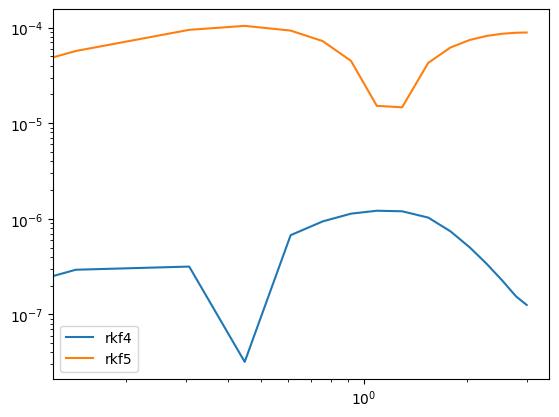

Para la solución de orden 4 se necesitaron 102 evaluaciones
Para la solución de orden 5 se necesitaron 102 evaluaciones


In [27]:
def f(t, y): #Función de la ecuación diferencial
    return (2 - 2*t*y)/(t**2 + 1)

ts_rkf4, sol_rkf4, hs_rkf4, rs_rkf4, ev4 = rkf4(f, 0, 3, 1, 1e-6, 0.01, 0.25) #Aquí se guardan los arreglos para la solución de orden 4
ts_rkf5, sol_rkf5, hs_rkf5, rs_rkf5, ev5 = rkf5(f, 0, 3, 1, 1e-6, 0.01, 0.25) #Aquí se guardan los arreglos para la solución de orden 5
exacta_rkf4 = (2*ts_rkf4 + 1)/((ts_rkf4)**2 + 1) #Solución exacta usando el intervalo para rkf4
exacta_rkf5 = (2*ts_rkf5 + 1)/((ts_rkf5)**2 + 1) #Solución exacta usando el intervalo para rkf5
plt.loglog(ts_rkf4, abs(sol_rkf4 - exacta_rkf4), label='rkf4')
plt.loglog(ts_rkf5, abs(sol_rkf5 - exacta_rkf5), label='rkf5')
plt.legend()
plt.show()

print(f'Para la solución de orden 4 se necesitaron {ev4} evaluaciones')
print(f'Para la solución de orden 5 se necesitaron {ev5} evaluaciones')

En el gráfico vemos que la solución de orden 4 es más precisa que el de orden 5. Por esta razón es preferible usar el método Runge-Kutta-Fehlberg de orden 4.